In [1]:
import numpy as np
import pandas as pd

import pickle
import scipy
import scipy.sparse as sp

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
INPUT_DATA_FOLDER = "final_data"

MODEL_FOLDER = "model"

In [3]:
X_test = pickle.load(open(f"{MODEL_FOLDER}/X_test.pkl", "rb"))

y_test = pickle.load(open(f"{MODEL_FOLDER}/y_test.pkl", "rb"))

In [3]:
def plot_confusion_matrix(clf, y_test, predicted):
    classes = clf.classes_
    classes[0], classes[1] = classes[1], classes[0]

    cm = confusion_matrix(y_test, predicted, labels=classes)
    cm = cm.T

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()

def evaluate_classification(y_test, predicted):
    accuracy = accuracy_score(y_test, predicted)
    precision = precision_score(y_test, predicted)
    recall = recall_score(y_test, predicted)
    f1 = f1_score(y_test, predicted)

    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-measure: ", f1)

Analysis of models trained using 80/20 distribution

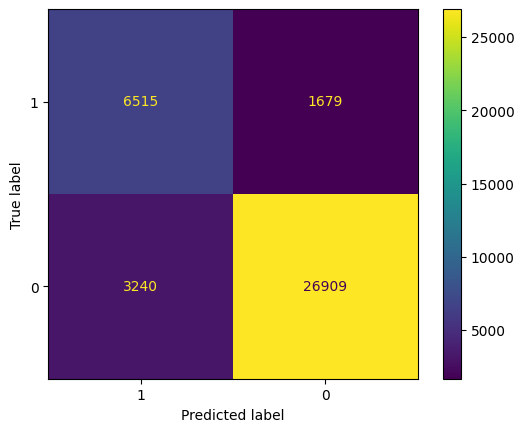

In [5]:
clf1 = pickle.load(open(f"{MODEL_FOLDER}/8_random_forest_v2.pkl", "rb"))
predicted1 = clf1.predict(X_test)

plot_confusion_matrix(clf1, y_test, predicted1)

In [6]:
print("Random forest v2")
evaluate_classification(y_test, predicted1)

Random forest v2
Accuracy:  0.8717106121065122
Precision:  0.7950939711984378
Recall:  0.6678626345463865
F-measure:  0.7259457351384478


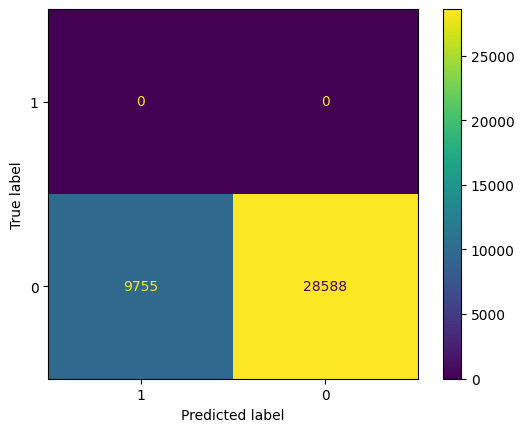

In [7]:
clf2 = pickle.load(open(f"{MODEL_FOLDER}/8_SGD_v1.pkl", "rb"))
predicted2 = clf2.predict(X_test)

plot_confusion_matrix(clf2, y_test, predicted2)

In [8]:
print(" Stochastic Gradient Descent v1")
evaluate_classification(y_test, predicted2)

 Stochastic Gradient Descent v1
Accuracy:  0.7455858957306418
Precision:  0.0
Recall:  0.0
F-measure:  0.0


c:\Users\Danyil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


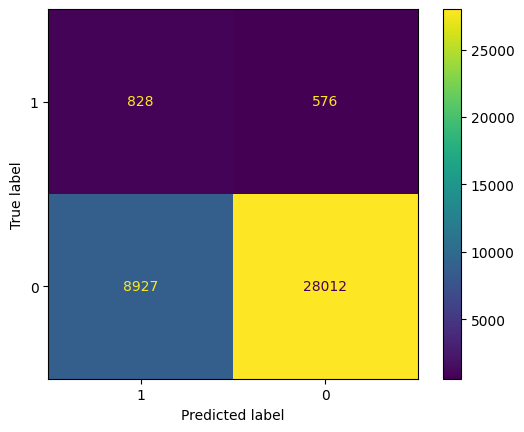

In [9]:
clf3 = pickle.load(open(f"{MODEL_FOLDER}/8_logistic_regression_v4.pkl", "rb"))
predicted3 = clf3.predict(X_test)

plot_confusion_matrix(clf3, y_test, predicted3)

In [10]:
print("Logistic regression v4")
evaluate_classification(y_test, predicted3)

Logistic regression v4
Accuracy:  0.7521581514226847
Precision:  0.5897435897435898
Recall:  0.0848795489492568
F-measure:  0.1484003943005646


In [14]:
indices = range(0, X_test.shape[0], 4)
rows = [X_test.getrow(idx) for idx in indices]

X_test_quarter = sp.vstack(rows)

y_test_quarter = y_test[::4]

In [12]:
X_test_quarter.shape

(9586, 9032)

In [15]:
y_test_quarter.shape

(9586,)

In [16]:
# with open(f"{MODEL_FOLDER}/X_test_quarter.pkl", 'wb') as handle:
#     pickle.dump(X_test, handle)

# with open(f"{MODEL_FOLDER}/y_test_quarter.pkl", 'wb') as handle:
#     pickle.dump(y_test, handle)

In [4]:
X_test_quarter = pickle.load(open(f"{MODEL_FOLDER}/X_test_quarter.pkl", "rb"))

y_test_quarter = pickle.load(open(f"{MODEL_FOLDER}/y_test_quarter.pkl", "rb"))

In [5]:
clf4 = pickle.load(open(f"{MODEL_FOLDER}/8_svc_v1.pkl", "rb"))
predicted4 = clf4.predict(X_test_quarter)

plot_confusion_matrix(clf4, y_test_quarter, predicted4)

In [ ]:
print("Support Vector Machines v1")
evaluate_classification(y_test_quarter, predicted4)